<a href="https://colab.research.google.com/github/NamanChanduka/GNR/blob/main/GNR638-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import seaborn as sns
import os
import matplotlib.pyplot as plot
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

***Upload gnr_test.tar.xz and gnr_train.tar.xz***

In [2]:
import tarfile
my_tar = tarfile.open('gnr_train.tar.xz')
my_tar.extractall('./data/train') # specify which folder to extract to
my_tar.close()
my_tar = tarfile.open('gnr_test.tar.xz')
my_tar.extractall('./data/test') # specify which folder to extract to
my_tar.close()

In [3]:
def get_images(path):
  Images = []
  Labels = []

  for labels in os.listdir(path):
    if os.path.isdir(path+labels):
      if labels == 'basketball_court':
        label = 0
      elif labels == 'bridge':
        label = 1
      elif labels == 'crosswalk':
        label = 2
      elif labels == 'golf_course':
        label = 3
      elif labels == 'oil_well':
        label = 4
      elif labels == 'overpass':
        label = 5
      elif labels == 'railway':
        label = 6
      elif labels == 'runway':
        label = 7
      elif labels == 'swimming_pool':
        label = 8
      elif labels == 'tennis_court':
        label = 9

      for image in os.listdir(path+labels):
        img = cv2.imread(path+labels+'/'+image)
        img = cv2.resize(img, (256, 256))
        Images.append(img)
        Labels.append(label)

    else:

      for image in os.listdir(path):
        img = cv2.imread(path+'/'+image)
        img = cv2.resize(img, (256, 256))
        Images.append(img)
      break
  return Images, Labels

def get_classlabel(class_code):
  labels = {0:'basketball_court', 1:'bridge', 2:'crosswalk', 3:'golf_course', 4:'oil_well', 5:'overpass', 6:'railway', 7:'runway', 8:'swimming_pool', 9:'tennis_court'}
  return labels[class_code]

In [4]:
Images, Labels = get_images('./data/train/train/') 
Images = np.array(Images) 
Labels = np.array(Labels)

print("Shape of Images array is:",Images.shape)
print("Shape of Labels array is:",Labels.shape)

Shape of Images array is: (500, 256, 256, 3)
Shape of Labels array is: (500,)


In [5]:
from sklearn.model_selection import train_test_split
import random as rn
x_train,x_test,y_train,y_test=train_test_split(Images,Labels,test_size=0.2) 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
img_height = 256
img_width = 256

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
  ]
)

normalization_layer = layers.Rescaling(1./255)

In [8]:
def createmodel():
    model = Models.Sequential()

    #model.add(data_augmentation)
    #model.add(normalization_layer)
    # 1st Convolutional Layer
    model.add(Layers.Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (256,256,3)))
    model.add(Layers.MaxPool2D())
    model.add(Layers.BatchNormalization())
    #model.add(Layers.Dropout(0.15))
    # 2nd Convolutional Layer
    model.add(Layers.Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D())
    model.add(Layers.BatchNormalization())
    #model.add(Layers.Dropout(0.15))
    # 3rd Convolutional Layer
    model.add(Layers.Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D())
    model.add(Layers.BatchNormalization())
    #model.add(Layers.Dropout(0.15))
    # 4th Convolutional Layer
    model.add(Layers.Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D())
    model.add(Layers.BatchNormalization())
    #model.add(Layers.Dropout(0.15))
    # 5th Convolutional Layer
    model.add(Layers.Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
    model.add(Layers.MaxPool2D())
    model.add(Layers.BatchNormalization())
    model.add(Layers.Dropout(0.2))

    model.add(Layers.Flatten())

    # 1st Fully Connected Layer
    model.add(Layers.Dense(256,activation="relu"))
    #model.add(Layers.Dropout(0.1))
    model.add(Layers.BatchNormalization())
    # 2nd Fully Connected Layer
    model.add(Layers.Dense(128,activation="relu"))
    #model.add(Layers.Dropout(0.1)) 
    model.add(Layers.BatchNormalization())
    # Add output layer
    model.add(Layers.Dense(10,activation="softmax"))
    return model

model1 = createmodel()
batch_size = 32

model1.summary()
Utils.plot_model(model1,to_file='model.png',show_shapes=True)

model1.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)      

In [9]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

red_lr= ReduceLROnPlateau(monitor='val_loss',patience=4,verbose=1,factor=0.1, mode='min', min_lr=10**(-13))
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')

epochs = 100
history = model1.fit(x_train,y_train, batch_size=batch_size, 
                        epochs=epochs, 
                        validation_data = (x_test,y_test),
                        verbose = 1,
                        callbacks=[red_lr, mcp_save])

Epoch 1/100
13/13 [==============================] - 13s 519ms/step - loss: 1.0175 - accuracy: 0.6800 - val_loss: 188.6517 - val_accuracy: 0.1000
Epoch 2/100
13/13 [==============================] - 3s 262ms/step - loss: 0.2799 - accuracy: 0.9125 - val_loss: 67.8512 - val_accuracy: 0.1000
Epoch 3/100
13/13 [==============================] - 3s 264ms/step - loss: 0.2092 - accuracy: 0.9525 - val_loss: 39.4948 - val_accuracy: 0.1000
Epoch 4/100
13/13 [==============================] - 3s 263ms/step - loss: 0.1039 - accuracy: 0.9700 - val_loss: 14.9501 - val_accuracy: 0.1700
Epoch 5/100
13/13 [==============================] - 3s 261ms/step - loss: 0.0743 - accuracy: 0.9775 - val_loss: 12.6160 - val_accuracy: 0.1000
Epoch 6/100
13/13 [==============================] - 3s 262ms/step - loss: 0.0786 - accuracy: 0.9825 - val_loss: 7.4780 - val_accuracy: 0.1100
Epoch 7/100
13/13 [==============================] - 3s 263ms/step - loss: 0.1990 - accuracy: 0.9525 - val_loss: 5.7831 - val_accuracy:

Text(0.5, 1.0, 'Accuracy Curves')

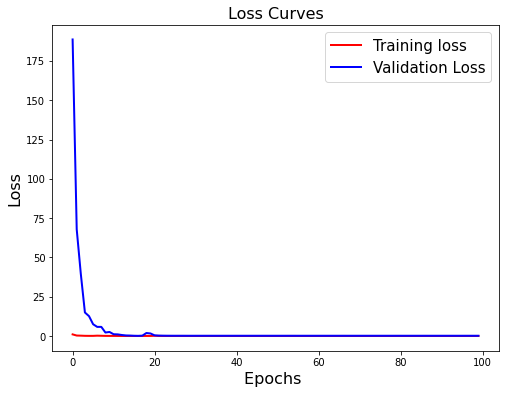

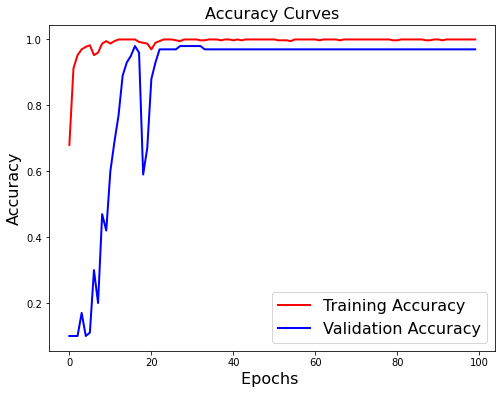

In [10]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [11]:
model1.load_weights('.mdl_wts.hdf5')

In [12]:
pred_images,no_labels = get_images('./data/test/')
pred_images = np.array(pred_images)
pred_images.shape

(100, 256, 256, 3)

In [13]:
submission = pd.DataFrame()
a= []
b=[]

for img in os.listdir('./data/test/'):
    image = cv2.imread('./data/test/'+str(img)) 
    image = cv2.resize(image,(256,256)) 
    image = np.reshape(image,[1,256,256,3])
    a.append(img[0:3])
    b.append(np.argmax(model1.predict(image)[0], axis=-1)+1)
    
    
submission['ImageID'] = a
submission['LabelID']= b
    
sub = submission.sort_values(by=['ImageID'])


In [14]:
sub.head()

,ImageID,LabelID
19,101,5
38,102,8
90,103,3
83,104,5
66,105,2


In [15]:
sub.to_csv('gnr.csv', index=False)